<a href="https://colab.research.google.com/github/bhattijasjeet/Datascience_ai/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Import Libraries and Packages


# Data Maniplulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data Modeling
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and Helpful Functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report

# Saving Models
import pickle

In [125]:
# Data Loading

df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_attrition_combined.csv")
# df0 = pd.read_csv("/content/drive/MyDrive/attrition/Employee_train.csv")

df0.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [126]:
df0.info()
# 52685 - mid
# 30585 - entry
# 54656 - senior

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56813 entries, 0 to 56812
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               56813 non-null  int64  
 1   Age                       56813 non-null  int64  
 2   Gender                    56813 non-null  object 
 3   Years at Company          56813 non-null  int64  
 4   Job Role                  56813 non-null  object 
 5   Monthly Income            56813 non-null  int64  
 6   Work-Life Balance         56813 non-null  object 
 7   Job Satisfaction          56813 non-null  object 
 8   Performance Rating        56813 non-null  object 
 9   Number of Promotions      56812 non-null  float64
 10  Overtime                  56812 non-null  object 
 11  Distance from Home        56812 non-null  float64
 12  Education Level           56812 non-null  object 
 13  Marital Status            56812 non-null  object 
 14  Number

In [127]:
# Change dtypes of left, promotion_last_5years, Work_accident to boolean

df = df0.copy()
# df[["left", "promotion_last_5years", "Work_accident"]] = df[[
#     "left", "promotion_last_5years", "Work_accident"]].astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56813 entries, 0 to 56812
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               56813 non-null  int64  
 1   Age                       56813 non-null  int64  
 2   Gender                    56813 non-null  object 
 3   Years at Company          56813 non-null  int64  
 4   Job Role                  56813 non-null  object 
 5   Monthly Income            56813 non-null  int64  
 6   Work-Life Balance         56813 non-null  object 
 7   Job Satisfaction          56813 non-null  object 
 8   Performance Rating        56813 non-null  object 
 9   Number of Promotions      56812 non-null  float64
 10  Overtime                  56812 non-null  object 
 11  Distance from Home        56812 non-null  float64
 12  Education Level           56812 non-null  object 
 13  Marital Status            56812 non-null  object 
 14  Number

In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,1


In [130]:
df.dropna(inplace=True)

In [131]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
Stayed,52.473069
Left,47.526931


In [132]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Attrition', 'Job Level','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Remote Work','Leadership Opportunities','Innovation Opportunities','Overtime']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [133]:
df
# 52685 - mid - 1
# 30585 - entry - 0
# 54656 - senior - 2

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,2,0,2.0,...,0.0,1,Medium,89.0,0,0,0,0,2,1
1,64756,59,Female,4,Media,5534,Poor,0,3,3.0,...,3.0,1,Medium,21.0,0,0,0,1,1,1
2,30257,24,Female,10,Healthcare,8159,Good,0,3,0.0,...,3.0,1,Medium,74.0,0,0,0,3,1,1
3,65791,36,Female,7,Education,3989,Good,0,2,1.0,...,2.0,1,Small,50.0,1,0,0,2,2,1
4,65026,56,Male,41,Education,4821,Fair,3,0,0.0,...,0.0,2,Medium,68.0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56807,48652,52,Male,19,Media,6424,Good,2,0,0.0,...,3.0,1,Medium,47.0,0,0,0,1,0,0
56808,29690,46,Female,3,Education,4026,Good,3,1,0.0,...,3.0,0,Medium,41.0,0,0,1,0,0,0
56809,66094,26,Male,11,Technology,10268,Good,0,0,2.0,...,1.0,1,Small,38.0,0,0,0,2,2,1
56810,67497,34,Female,21,Finance,9728,Fair,1,2,0.0,...,1.0,0,Medium,66.0,0,0,0,2,3,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56812 entries, 0 to 56811
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               56812 non-null  int64  
 1   Age                       56812 non-null  int64  
 2   Gender                    56812 non-null  object 
 3   Years at Company          56812 non-null  int64  
 4   Job Role                  56812 non-null  object 
 5   Monthly Income            56812 non-null  int64  
 6   Work-Life Balance         56812 non-null  object 
 7   Job Satisfaction          56812 non-null  int64  
 8   Performance Rating        56812 non-null  int64  
 9   Number of Promotions      56812 non-null  float64
 10  Overtime                  56812 non-null  int64  
 11  Distance from Home        56812 non-null  float64
 12  Education Level           56812 non-null  object 
 13  Marital Status            56812 non-null  object 
 14  Number of D

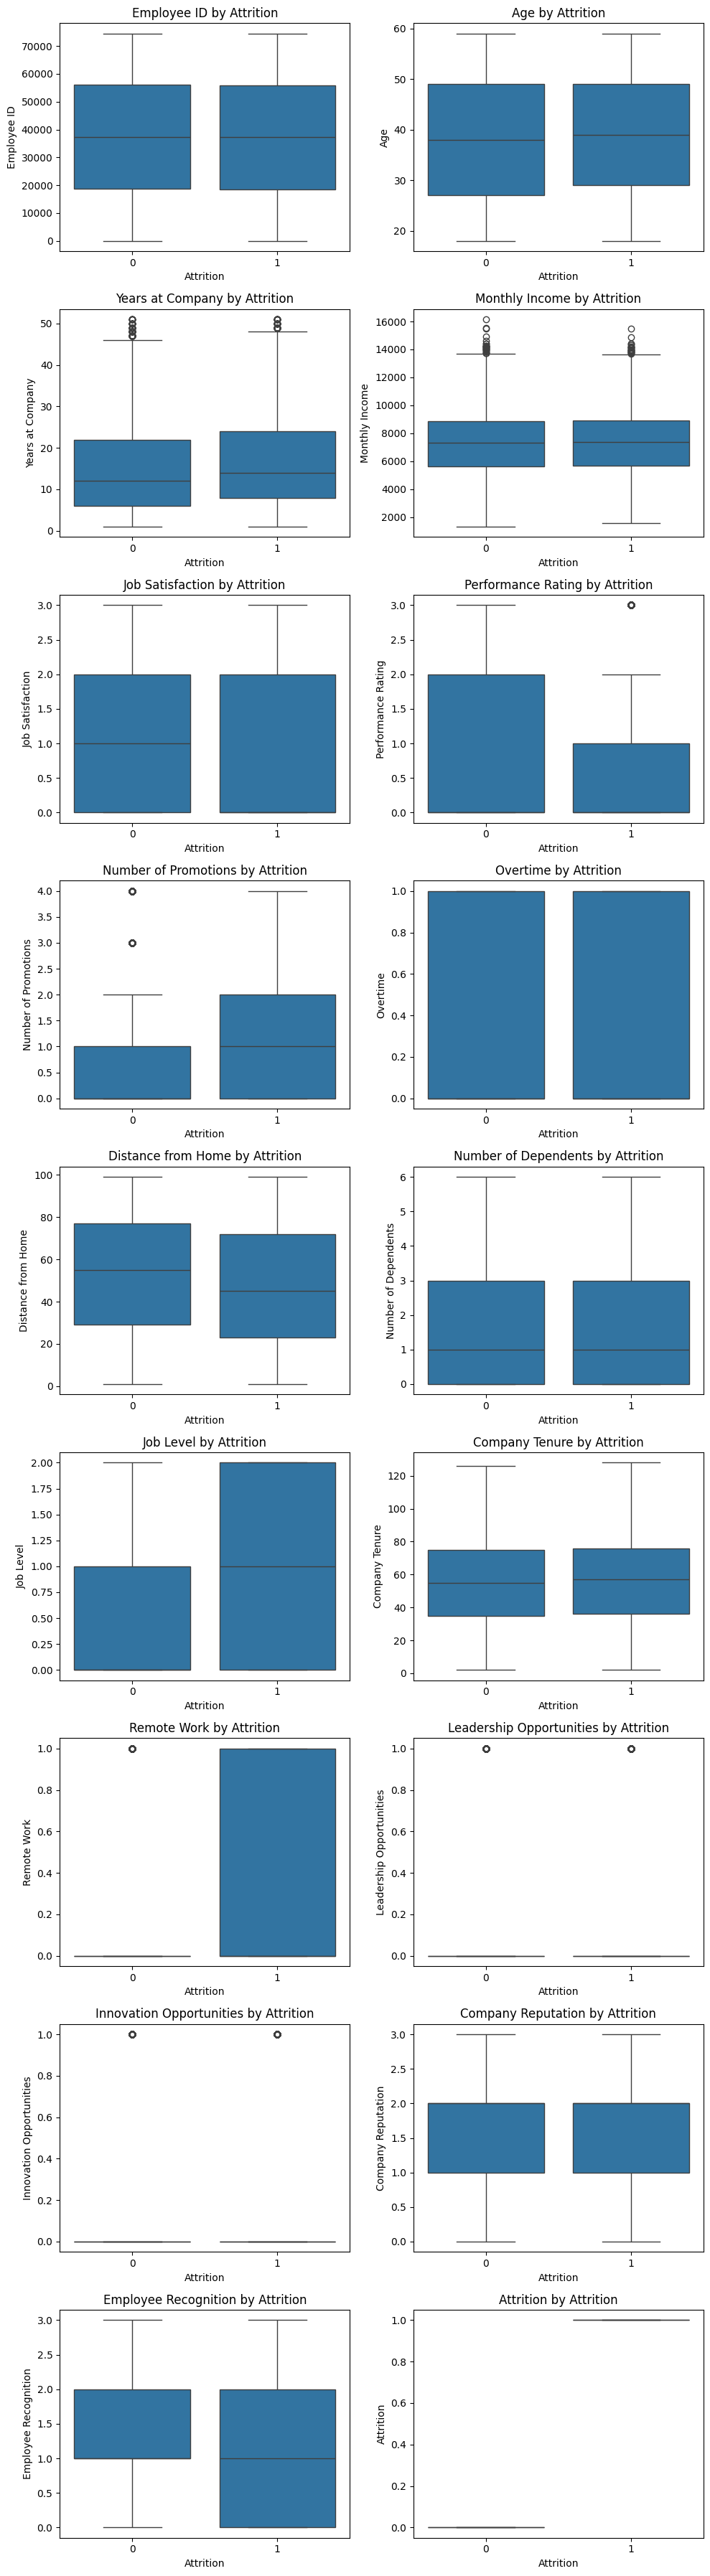

In [135]:
# Check Outliers through Boxplots

import math

# Select Numeric Columns and exclude boolean and Categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# # Create a boxplot as Subplot for numeric_cols
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numeric_cols):
#     plt.subplot(2, 3, i + 1)
#     sns.boxplot(y=df[col])
#     plt.title(f'Boxplot of {col}')
# plt.tight_layout()
# plt.show()


n = len(numeric_cols)
rows = math.ceil(n / 2)   # 3 plots per row
cols = 2

plt.figure(figsize=(5*cols, 4*rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x="Attrition", y=col, data=df)
    plt.title(f'{col} by Attrition')

plt.tight_layout()
plt.show()

In [136]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,2,0,2.0,...,0.0,1,Medium,89.0,0,0,0,0,2,1
1,64756,59,Female,4,Media,5534,Poor,0,3,3.0,...,3.0,1,Medium,21.0,0,0,0,1,1,1
2,30257,24,Female,10,Healthcare,8159,Good,0,3,0.0,...,3.0,1,Medium,74.0,0,0,0,3,1,1
3,65791,36,Female,7,Education,3989,Good,0,2,1.0,...,2.0,1,Small,50.0,1,0,0,2,2,1
4,65026,56,Male,41,Education,4821,Fair,3,0,0.0,...,0.0,2,Medium,68.0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56807,48652,52,Male,19,Media,6424,Good,2,0,0.0,...,3.0,1,Medium,47.0,0,0,0,1,0,0
56808,29690,46,Female,3,Education,4026,Good,3,1,0.0,...,3.0,0,Medium,41.0,0,0,1,0,0,0
56809,66094,26,Male,11,Technology,10268,Good,0,0,2.0,...,1.0,1,Small,38.0,0,0,0,2,2,1
56810,67497,34,Female,21,Finance,9728,Fair,1,2,0.0,...,1.0,0,Medium,66.0,0,0,0,2,3,0


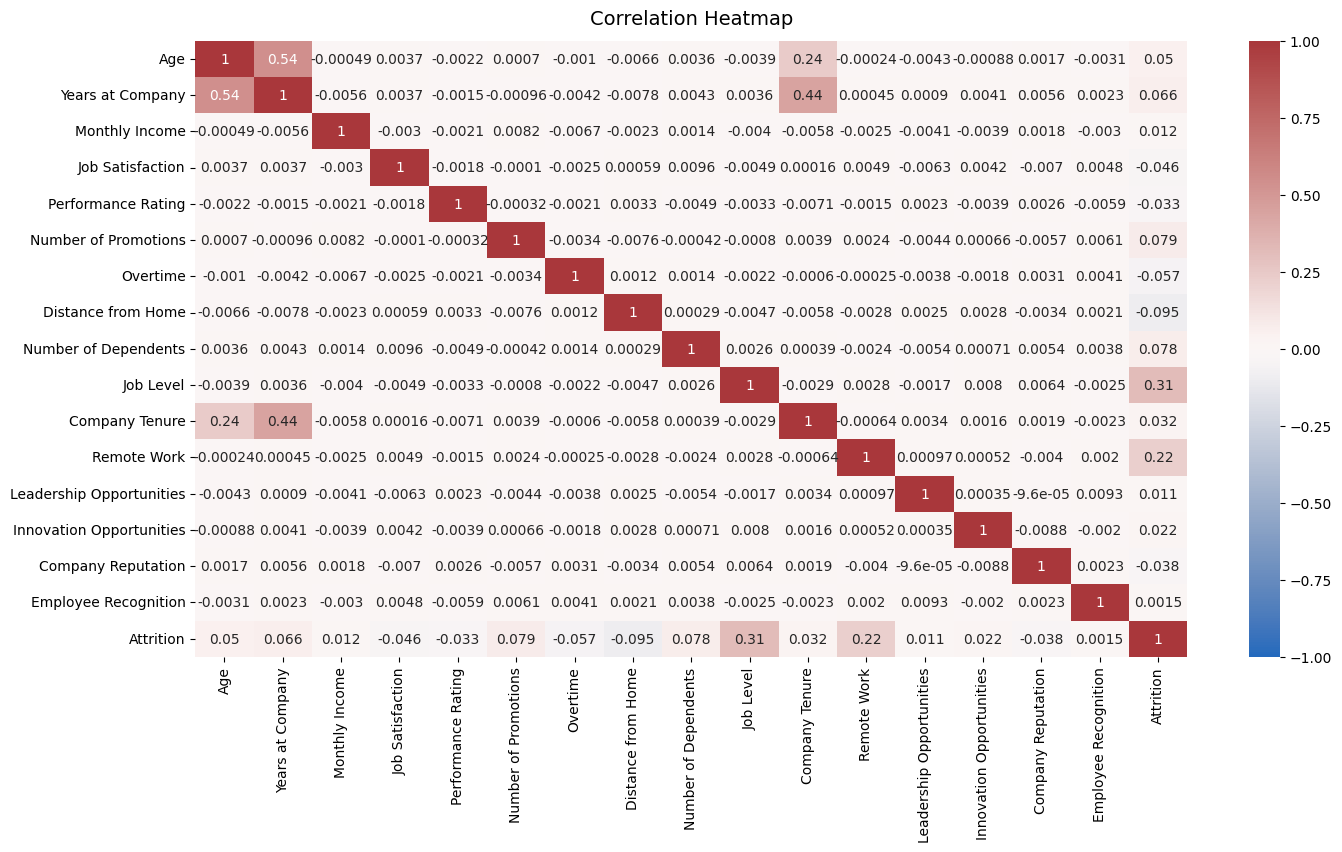

In [137]:
# Plot a correlation heatmap


# Prepare data for heatmap
df_heat = df.copy()
df_heat = df_heat.drop(columns=['Employee ID'])
# Drop all object (string/categorical) columns
df_heat = df_heat.drop(columns=df_heat.select_dtypes(include=['object']).columns)




# Plot heatmap
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_heat.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

In [138]:
# Spearman Correlation Analysis Between DV and IVS
from scipy import stats

# Define DV and IVS
dv_spearman = df['Attrition']
iv_spearman = df.copy()
iv_spearman = iv_spearman.drop(columns=['Employee ID','Attrition'])
iv_spearman = iv_spearman.drop(columns=iv_spearman.select_dtypes(include=['object']).columns)


# # Compute Spearman correlations for all IVs × all DV
corr_table = []
for col in iv_spearman.columns:
    rho, pval = stats.spearmanr(iv_spearman[col], dv_spearman)
    corr_table.append({
        'IV': col,
        'DV': 'left',
        'Spearman_rho': rho,
        'p_value': pval
    })

# Convert to DataFrame
corr_df = pd.DataFrame(corr_table)

# Display correlation table
corr_df=corr_df.sort_values(by="Spearman_rho", ascending=False)
corr_df

,IV,DV,Spearman_rho,p_value
9,Job Level,left,0.308091,0.000000e+00
11,Remote Work,left,0.220456,0.000000e+00
1,Years at Company,left,0.075571,9.796432e-73
8,Number of Dependents,left,0.065200,1.432713e-54
5,Number of Promotions,left,0.058909,7.372210e-45
0,Age,left,0.049658,2.337979e-32
10,Company Tenure,left,0.030435,3.993302e-13
13,Innovation Opportunities,left,0.021890,1.808145e-07
2,Monthly Income,left,0.012200,3.637516e-03
12,Leadership Opportunities,left,0.011028,8.576022e-03


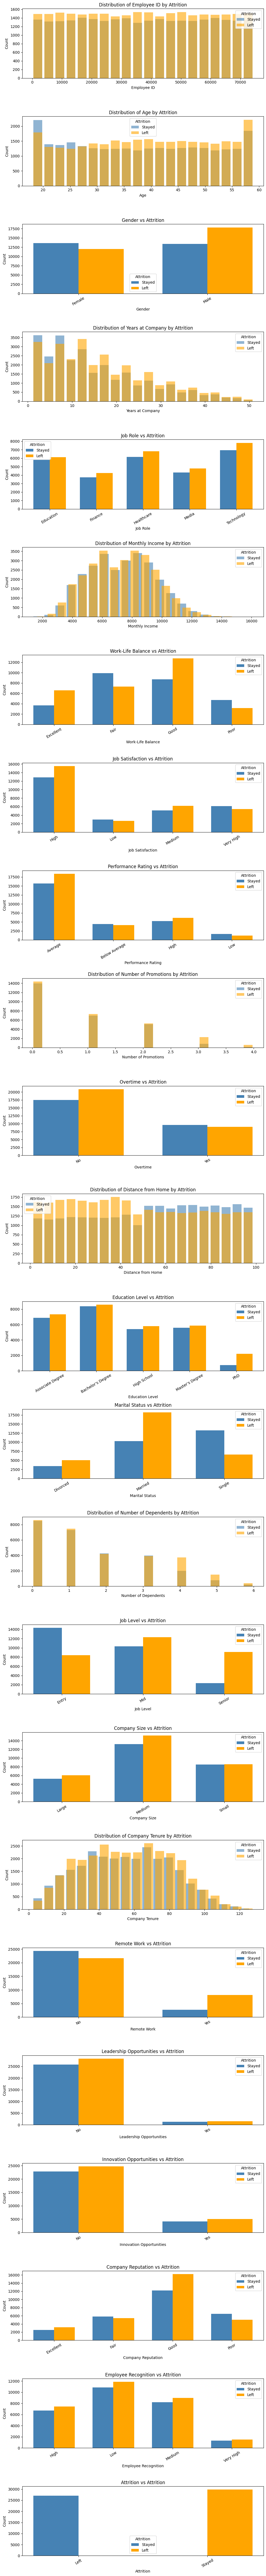

In [139]:
# Univariate Analysis for Numeric and Categorical Variables

target = "Attrition"
# cols = [
#     "Job Level",
#     "Remote Work",
#     "Years at Company",
#     "Number of Promotions",
#     "Age",
#     "Gender",
#     # "Number of Dependents",
#     # "Company Tenure",
#     "Innovation Opportunities",
#     "Leadership Opportunities",
#     # "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Performance Rating",
#     "Overtime",
#     "Job Satisfaction",
#     # "Distance from Home"
# ]

cols=df0.columns

n_rows = len(cols)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4*n_rows))

for ax, col in zip(axes, cols):
    if pd.api.types.is_numeric_dtype(df0[col]):
        # Numeric: histogram split by target
        # for label, color in zip([0,1], ["steelblue", "orange"]):
        #     subset = df[df0[target]==label][col]
        #     ax.hist(subset, bins=20, alpha=0.6,
        #             label="Stayed" if label==0 else "Left",
        #             color=color, rwidth=0.8)
        # ax.set_xlabel(col)
        # ax.set_ylabel("Count")
        # ax.set_title(f"Distribution of {col} by {target}")
        # ax.legend(title="Attrition")
          for label, color in zip([0, 1], ["steelblue", "orange"]):
            subset = df[df[target] == label][col]
            ax.hist(
            subset, bins=20, alpha=0.6,
            label="Stayed" if label == 0 else "Left",
            color=color, rwidth=0.8
            )
          ax.set_xlabel(col)
          ax.set_ylabel("Count")
          ax.set_title(f"Distribution of {col} by {target}")
          ax.legend(title="Attrition")
    else:
        # Categorical: bar chart
        counts = pd.crosstab(df0[col], df0[target])
        categories = counts.index.astype(str)

        x = np.arange(len(categories))
        width = 0.35

        # use .iloc instead of direct [0]/[1]
        ax.bar(x - width/2, counts.iloc[:,0], width, label="Stayed", color="steelblue")
        ax.bar(x + width/2, counts.iloc[:,1], width, label="Left", color="orange")

        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=30)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.set_title(f"{col} vs {target}")
        ax.legend(title="Attrition")

plt.tight_layout()
plt.show()

In [140]:
# print("Years at Company",df0['Years at Company'].unique())
# print("Age",df0['Age'].unique())


# cols=df0.columns

# for ax, col in zip(axes, cols):
#     if pd.api.types.is_numeric_dtype(df0[col]):
#        print(col,df0[col].unique(),"\n")


In [141]:
df0

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56808,29690,46,Female,3,Education,4026,Good,Very High,Below Average,0.0,...,3.0,Entry,Medium,41.0,No,No,Yes,Excellent,High,Left
56809,66094,26,Male,11,Technology,10268,Good,High,Average,2.0,...,1.0,Mid,Small,38.0,No,No,No,Good,Medium,Stayed
56810,67497,34,Female,21,Finance,9728,Fair,Low,High,0.0,...,1.0,Entry,Medium,66.0,No,No,No,Good,Very High,Left
56811,46100,30,Male,17,Technology,11601,Good,Medium,Average,1.0,...,1.0,Senior,Medium,23.0,Yes,Yes,No,Excellent,High,Stayed


In [142]:
df_model = df0.copy()

# df_model['Job Level'] = df_model['average_montly_hours']
# df_model['overworked'] = (df_model['overworked'] > 160).astype(int)


df_model.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [143]:

df_model = df_model.drop(columns=['Employee ID'])

In [144]:
# features = [
#     "Age",
#     "Number of Dependents",
#     "Distance from Home",
#     "Years at Company",
#     "Job Satisfaction",
#     "Leadership Opportunities",
#     "Innovation Opportunities",
#     "Performance Rating",
#     "Number of Promotions",
#     "Monthly Income",
#     "Employee Recognition",
#     "Company Reputation",
#     "Overtime",
#     "Remote Work"
# ]

In [145]:
# 1. Split Features & Target

y = df_model['Attrition']
X = df_model.drop(columns='Attrition')

print(y.head())
print ('--' * 10)
X.head()

0    Stayed
1    Stayed
2    Stayed
3    Stayed
4    Stayed
Name: Attrition, dtype: object
--------------------


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,Married,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,Divorced,3.0,Mid,Medium,21.0,No,No,No,Fair,Low
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,Married,3.0,Mid,Medium,74.0,No,No,No,Poor,Low
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,Single,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,Divorced,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium


In [146]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [157]:
X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

In [158]:
# 3. Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical Features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [159]:
# 4. Preprocessing

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# numeric_transformer = Pipeline(steps=[
#     ("scaler", StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", numeric_transformer, numeric_features),
#         ("cat", categorical_transformer, categorical_features)
#     ]
# )

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [160]:
# Random Forest Classifier

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

In [161]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

,0


In [162]:
%%time

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

CPU times: user 10.1 s, sys: 90.4 ms, total: 10.2 s
Wall time: 10.4 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_freque...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Job Role',
                                                   'Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Overtime',
                                                   'Education Level',
                                                   'Marital Status',
                                                   'Job Level', 'Company Size',
                                                   'Remote Work',
                                                   'Leadership Opportunities',
                                                   'Innovation Opportunities',
                                                   'Company Reputation',
                                                   'Employee Recognition'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [163]:
# Make predictions on the training and test data
y_training_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)

In [164]:
# Calculate accuracy score on both training and test sets
train_accuracy_rf = accuracy_score(y_train, y_training_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate the gap between training and test accuracy
accuracy_gap_rf = (train_accuracy_rf - test_accuracy_rf) * 100

print(f"Accuracy Score on Training Data: {train_accuracy_rf:.4f}")
print(f"Accuracy Score on Test Data: {test_accuracy_rf:.4f}")
print(f"Gap between Training and Test Accuracy: {accuracy_gap_rf:.2f}%")

Accuracy Score on Training Data: 1.0000
Accuracy Score on Test Data: 0.7441
Gap between Training and Test Accuracy: 25.59%


In [165]:
# Calculate Classification Report and Confusion Matrix
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred_rf))

print ("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred_rf))


Classification Report on Test Data:
              precision    recall  f1-score   support

        Left       0.73      0.73      0.73      6699
      Stayed       0.76      0.75      0.76      7505

    accuracy                           0.74     14204
   macro avg       0.74      0.74      0.74     14204
weighted avg       0.74      0.74      0.74     14204

------------------------------------------------------------

Confusion Matrix on Test Data:
[[4904 1795]
 [1840 5665]]


In [166]:
# Baseline Accuracy Calculation numpy array format and compare to model test accuracy
from sklearn.preprocessing import LabelEncoder

# Encode y_test_pred_rf into integers
le = LabelEncoder()
y_test_pred_rf_encoded = le.fit_transform(y_test_pred_rf)

# Baseline = majority class accuracy
baseline_accuracy_rf = np.mean(y_test_pred_rf_encoded == np.bincount(y_test_pred_rf_encoded).argmax())
print(f"Baseline (Majority Class) Accuracy RF: {baseline_accuracy_rf:.4f}")

# Compare with your model accuracy
model_accuracy_rf = (test_accuracy_rf - baseline_accuracy_rf) * 100
print(f"Improvement over baseline: {model_accuracy_rf:.2f}%")


Baseline (Majority Class) Accuracy RF: 0.5252
Improvement over baseline: 21.89%


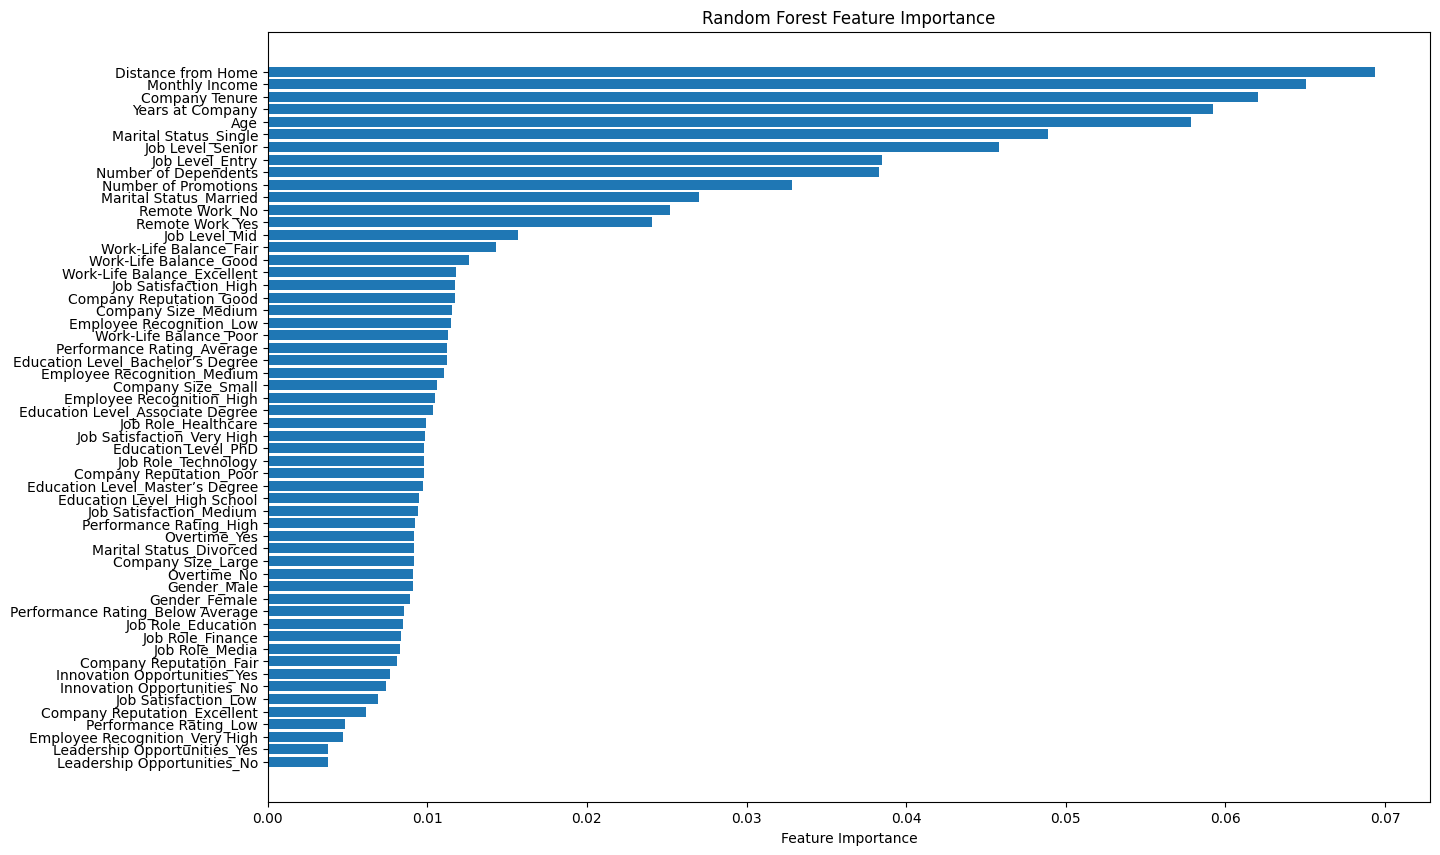

In [167]:
# Feature Importance Visualization of Random Forest

# Get trained RF model
rf_model = pipeline_rf.named_steps['model']

# Get feature names after preprocessing
ohe = pipeline_rf.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot
plt.figure(figsize=(15, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title("Random Forest Feature Importance")
plt.show()

In [168]:
y_test


,Attrition
6293,Left
46574,Stayed
24804,Stayed
36064,Left
31233,Stayed
...,...
37847,Left
10463,Stayed
47797,Stayed
54795,Stayed


In [169]:
# Xgboost Classifier

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Convert arrays to Series
y_test_s  = pd.Series(y_test)

# Fit label encoder on both
le = LabelEncoder()
le.fit(pd.concat([y_test_s]))

# Transform
y_test_enc  = le.transform(y_test_s)

print("Classes:", le.classes_)

# Define pipeline
pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"))
])


Classes: ['Left' 'Stayed']


In [170]:
%%time

# # Fit the pipeline to the training data
# pipeline_xgb.fit(X_train, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [171]:
from sklearn.preprocessing import LabelEncoder

# 1. Encode y (fit once on ALL data)
le = LabelEncoder()
y_all = pd.concat([y_train, y_test])  # Make sure both are pandas Series
le.fit(y_all)

# 2. Transform train & test
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)


In [172]:
pipeline_xgb.fit(X_train, y_train_enc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_freque...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [173]:
# Make predictions on the training and test data
y_training_pred_xgb = pipeline_xgb.predict(X_train)
y_test_pred_xgb = pipeline_xgb.predict(X_test)

In [174]:
# Accuracy (encoded targets)
train_accuracy_xgb = accuracy_score(y_train_enc, y_training_pred_xgb)
test_accuracy_xgb  = accuracy_score(y_test_enc, y_test_pred_xgb)

# Gap
accuracy_gap_xgb = (train_accuracy_xgb - test_accuracy_xgb) * 100

print(f"Train Accuracy: {train_accuracy_xgb:.4f}")
print(f"Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"Gap: {accuracy_gap_xgb:.2f}%")


Train Accuracy: 0.8430
Test Accuracy: 0.7429
Gap: 10.01%


In [175]:
# # Calculate accuracy score on both training and test sets
# train_accuracy_xgb = accuracy_score(y_train, y_training_pred_xgb)
# test_accuracy_xgb = accuracy_score(y_test_enc, y_test_pred_xgb)

# # Calculate the gap between training and test accuracy
# accuracy_gap_xgb = (train_accuracy_xgb - test_accuracy_xgb) * 100

# print(f"Accuracy Score on Training Data: {train_accuracy_xgb:.4f}")
# print(f"Accuracy Score on Test Data: {test_accuracy_xgb:.4f}")
# print(f"Gap between Training and Test Accuracy: {accuracy_gap_xgb:.2f}%")

In [176]:
# Calculate Classification Report and Confusion Matrix of Xgboost
print("\nClassification Report on Test Data:")
print(classification_report(y_test_enc, y_test_pred_xgb))

print ("--" * 30)
print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test_enc, y_test_pred_xgb))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6699
           1       0.76      0.76      0.76      7505

    accuracy                           0.74     14204
   macro avg       0.74      0.74      0.74     14204
weighted avg       0.74      0.74      0.74     14204

------------------------------------------------------------

Confusion Matrix on Test Data:
[[4857 1842]
 [1810 5695]]


In [177]:
# Baseline Accuracy Calculation numpy array format and compare to model test accuracy
baseline_accuracy_xgb = np.mean(y_test_pred_xgb == np.bincount(y_test_pred_xgb).argmax())
print(f"Baseline (Majority Class) Accuracy XGB: {baseline_accuracy_xgb:.4f}")

model_accuracy_xgb = (test_accuracy_xgb - baseline_accuracy_xgb) * 100
print(f"Model Accuracy over Baseline XGB: {model_accuracy_xgb:.2f}%")

Baseline (Majority Class) Accuracy XGB: 0.5306
Model Accuracy over Baseline XGB: 21.23%


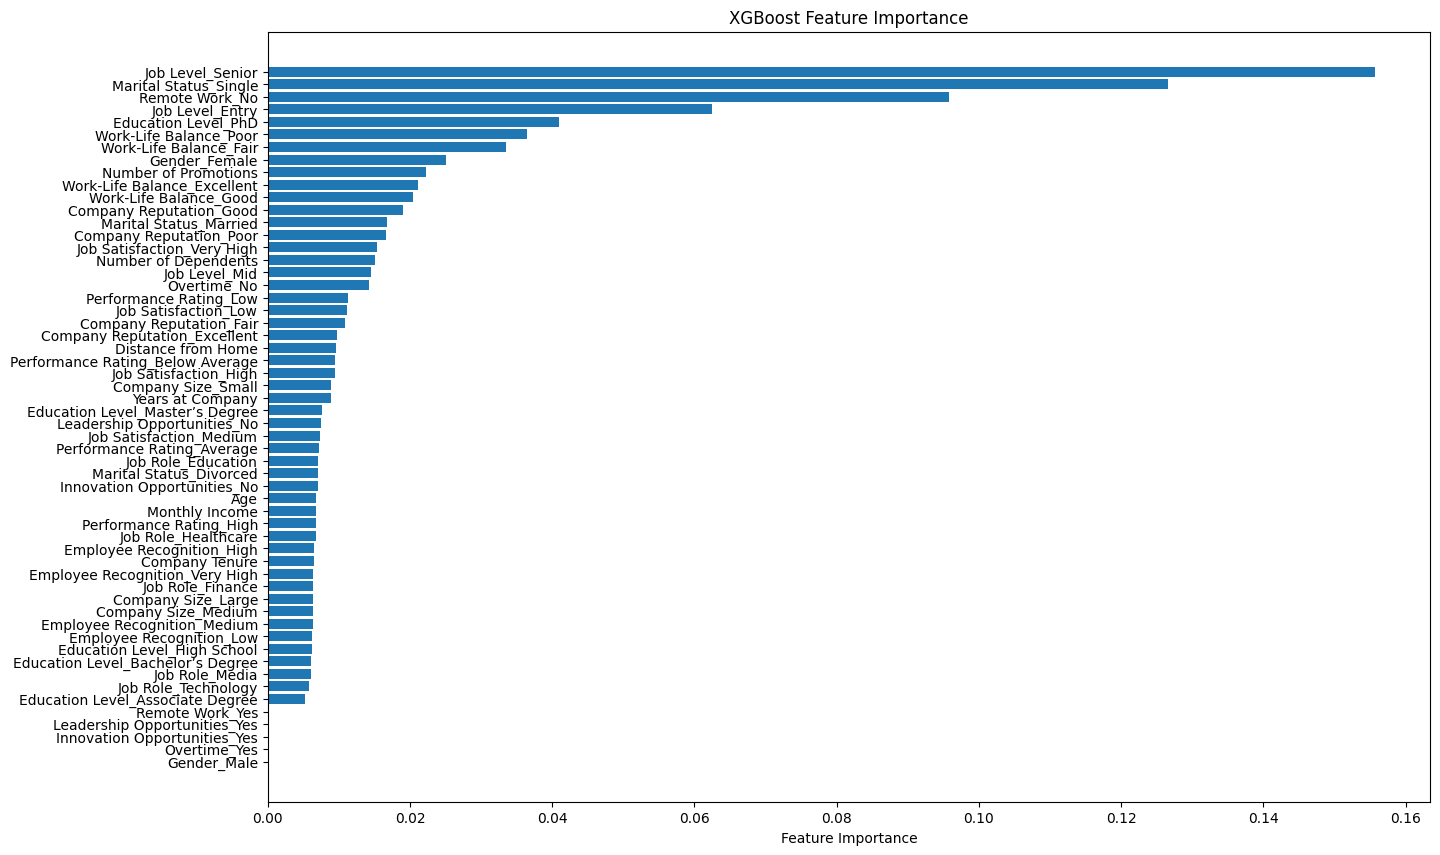

In [178]:
# Feature Importance Visualization of XGBoost

# Get trained XGBoost model
xgb_model = pipeline_xgb.named_steps['model']

# Get feature names after preprocessing
ohe = pipeline_xgb.named_steps['preprocessor'].named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, cat_features])

# Feature importance
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
pos = np.arange(sorted_idx.shape[0]) + 0.6

# Plot
plt.figure(figsize=(15, 10))
plt.barh(pos, feature_importances[sorted_idx], align='center')
plt.yticks(pos, [all_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title("XGBoost Feature Importance")
plt.show()

In [179]:

# Comparison Table

comparison_table = pd.DataFrame({
    ("Model", ""): ["Random Forest", "XGBoost"],
    ("Train", "Accuracy"): [train_accuracy_rf, train_accuracy_xgb],
    ("Test", "Accuracy"): [test_accuracy_rf, test_accuracy_xgb],
    ("Accuracy", " Gap %"): [accuracy_gap_rf, accuracy_gap_xgb],
    ("Model Accuracy", "over Baseline %"): [model_accuracy_rf, model_accuracy_xgb]
})

comparison_table.columns = pd.MultiIndex.from_tuples(comparison_table.columns)
comparison_table

,Model,Train,Test,Accuracy,Model Accuracy
,,Accuracy,Accuracy,Gap %,over Baseline %
0,Random Forest,1.000000,0.744086,25.591383,21.888201
1,XGBoost,0.843034,0.742889,10.014485,21.226415
